# Classification With the Titanic Dataset

In this notebook you will practice a supervised learning problem with the titanic dataset. You will try to predict whether or not a particular passenger lived or died based on other data about that passenger such as age, sex, fare, etc. If you want to continue to explore this dataset, see the Titanic competition on Kaggle:

https://www.kaggle.com/c/titanic

## Imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Load and prepare the data

In [2]:
raw_data = sns.load_dataset('titanic')

In [3]:
raw_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Prepare your data for machine learning:

* Drop rows with missing values or NaNs.
* Create a `DataFrame` for your features named `X` with a subset of numerical and
  boolean columns that you think will be useful in predicting who lived.
* Create a `Series` for your target variable named `y` from the `survived` column.

In [4]:
raw_data.dropna(inplace=True)

X = raw_data[["pclass", "alone"]]
y = raw_data.survived

Add additional columns to your feature `DataFrame` for any categorical columns you think will be relevant. For each such column:

* Use `pandas.get_dummies` to one-hot encode the categorical values.
* Use `pandas.concat` with `axis=1` to add those columns to the feature `DataFrame`

In [5]:
who = pd.get_dummies(raw_data["who"])
X = pd.concat([who, X], axis=1)

In [6]:
X.head()

,child,man,woman,pclass,alone
1,0,0,1,1,False
3,0,0,1,1,False
6,0,1,0,1,True
10,1,0,0,3,False
11,0,0,1,1,True


## Train/test split

Use `sklearn.cross_validation.train_test_split` to split your data into a training and test set. Save the resulting data in the variables:

* `Xtrain`
* `Xtest`
* `ytrain`
* `ytest`

In [7]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

Here are the shapes of the resulting arrays

In [8]:
Xtrain.shape, ytrain.shape

((136, 5), (136,))

In [9]:
Xtest.shape, ytest.shape

((46, 5), (46,))

## Gaussian Naive-Bayes classifier

Perform the following steps with the `sklearn.naive_bayes.GaussianNB` classifier:

1. Instantiate the model class
2. Fit the model with the training data
3. Use the model to make predictions about the test data

In [10]:
from sklearn.naive_bayes import GaussianNB

#1
clf = GaussianNB()

#2
clf.fit(Xtrain, ytrain)

#3
pred_ytest = clf.predict(Xtest)

Compute the accuracy of the model:

In [11]:
clf.score(Xtest, ytest)

0.76086956521739135

Use `sklearn.metrics.confusion_matrix` and Seaborn's `heatmap` to display the confusion matrix for this model:

[[14  4]
 [ 7 21]]


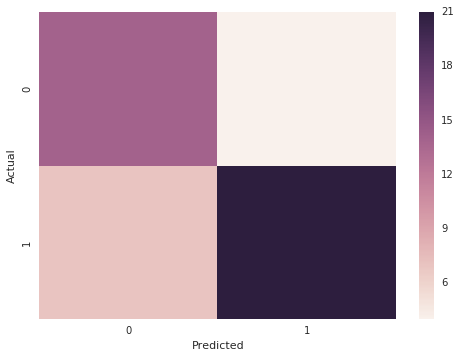

In [12]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(ytest, pred_ytest)
print(conf)
sns.heatmap(conf)
plt.xlabel("Predicted")
plt.ylabel("Actual");

## Random forest classifier

Perform the following steps with the `sklearn.ensemble.RandomForestClassifier` classifier:

1. Instantiate the model class
2. Fit the model with the training data
3. Use the model to make predictions about the test data

In [13]:
from sklearn.ensemble import RandomForestClassifier

forestClass = RandomForestClassifier()
forestClass.fit(Xtrain, ytrain)
forest_ytest = forestClass.predict(Xtest)

Compute the accuracy of the model:

In [14]:
forestClass.score(Xtrain, ytrain)

0.79411764705882348

Use `sklearn.metrics.confusion_matrix` and Seaborn's `heatmap` to display the confusion matrix for this model:

[[12  6]
 [ 7 21]]


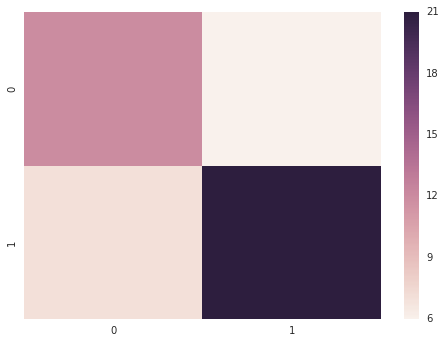

In [15]:
print(confusion_matrix(ytest, forest_ytest))
sns.heatmap(confusion_matrix(ytest, forest_ytest));

Use the `feature_importances_` attribute of the model to create a `DataFrame` that has two columns:

1. `feature`: the names of the features
2. `importance`: the importances of that feature

Sort by the feature importances.

In [16]:
forestClass.feature_importances_

array([ 0.02019308,  0.29047132,  0.52379612,  0.10661484,  0.05892463])

For extra credit, look through the feature importances and build a new set of features that only includes the most important ones. Build a random-forest model with those restricted features and compare its accuracy with that of the full set of features.